# Implementing and testing Otsu’s algorithm

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, util, morphology
from PIL import Image

### Create a synthetic image with two objects

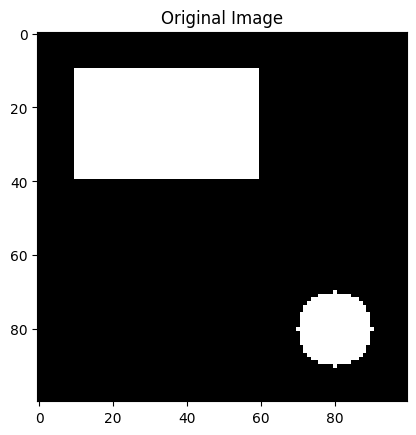

In [39]:
def draw_circle(img, center, radius, value):
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
                img[x, y] = value

def draw_rectangle(img, top_left, bottom_right, value):
    x_start, y_start = top_left
    x_end, y_end = bottom_right
    img[x_start:x_end, y_start:y_end] = value

image = np.zeros((100, 100), dtype=np.uint8)
draw_rectangle(image, top_left=(10, 10), bottom_right=(40, 60), value=127)
draw_circle(image, center=(80, 80), radius=10, value=127)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()



### Add Gaussian noise

In [40]:
noisy_image = util.random_noise(image, mode='gaussian', var=0.01) * 255

### Apply Otsu's thresholding

In [41]:
threshold = filters.threshold_otsu(noisy_image)
binary_image = noisy_image > threshold
opened_image = morphology.opening(binary_image, morphology.disk(1))
cleaned_image = morphology.closing(opened_image, morphology.disk(1))

### Output

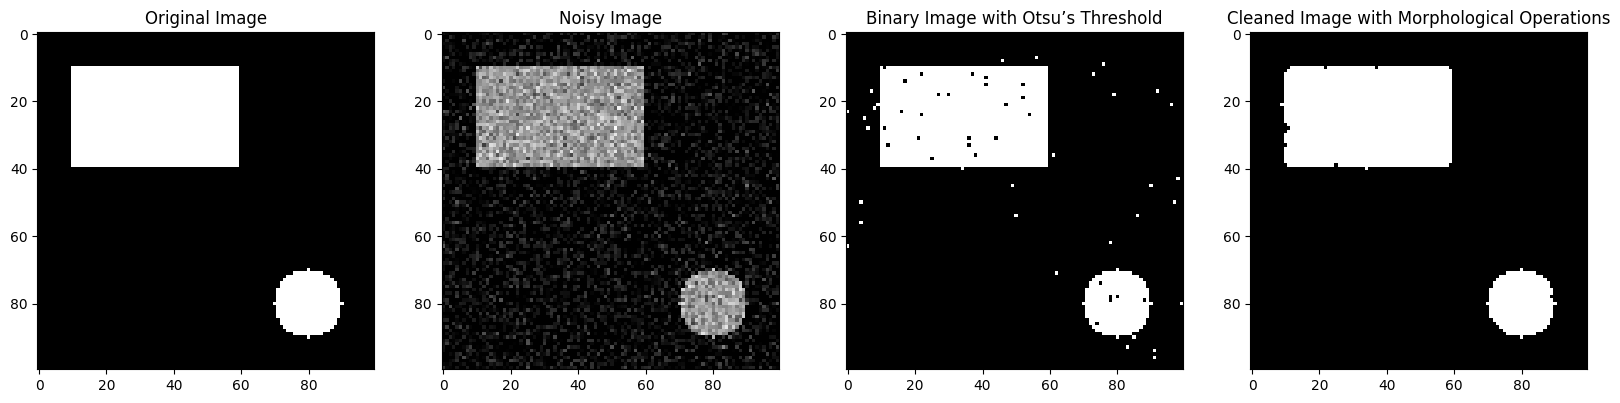

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Increased figure size for better visibility
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image')
axes[2].imshow(binary_image, cmap='gray')
axes[2].set_title('Binary Image with Otsu’s Threshold')
axes[3].imshow(cleaned_image, cmap='gray')
axes[3].set_title('Cleaned Image with Morphological Operations')
plt.show()

# Implement a region-growing technique for image segmentation



###   Parameters:
        img       : The input image (2D array).
        seeds     : List of seed points (x, y positions).
        threshold : Threshold for adding pixels to the region (max difference from seed).

  

### Implements the core functionality of the region-growing algorithm for image segmentation

In [5]:
def region_growing(img, seeds, threshold):

    segmented = np.zeros_like(img, dtype=bool)
    to_check = seeds[:]

    # Process all points in the check list
    while to_check:
        x, y = to_check.pop(0)
        # Mark the pixel as segmented
        segmented[x, y] = True
        # Check the neighbors of the pixel
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < img.shape[0] and 0 <= ny < img.shape[1]:
                    if not segmented[nx, ny]:
                        # Check if the neighbor pixel should be added to the region
                        if abs(int(img[nx, ny]) - int(img[x, y])) <= threshold:
                            segmented[nx, ny] = True
                            to_check.append((nx, ny))

    return segmented


### Load an image

In [30]:
img_path = '/content/drive/MyDrive/image.jpg'
image = Image.open(img_path).convert('L')
img = np.array(image)

### Define seeds and threshold

In [31]:
seeds = [(50, 50)]  S
threshold = 10


### Segment the image

In [32]:
segmented_image = region_growing(img, seeds, threshold)

Output

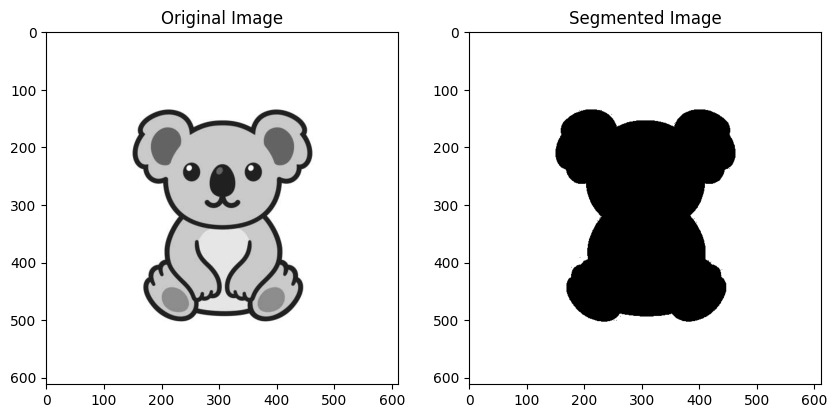

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.show()